# Project for IE6200 (2021 Spring)
## Nuli "Claire" Bang

## Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history.On April 15, 1912, during her  maiden  voyage,  the  widely  considered  “unsinkable”  RMS  Titanic  sank  after  colliding  with  an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.For thisproject youwere asked to answerthe following questions based on Titanic.CSV fileto find the possible groups of people were more likely to survive.

## Part 1
Data ManipulationIn order to analyzeand report on the data, youhave to use ipython notebook, along with the numpy, pandas, matplotlib.pyplot and seaborn python modules. Before you analyze on your data set, you need to preprocessyour original dataas the following questions.

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.1 What is the size of the dataset?

### 1.2 What are the features in this dataset? What is the data type of the features in the dataset?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.3 Are there any duplicated rows or columns? You can delete that row if there are duplicated rows and columns.

In [7]:
duplicated_df = df[df.duplicated()]
print ("number of duplicate rows: ", duplicated_df.shape)
print(duplicated_df)

number of duplicate rows:  (0, 12)
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


> no duplicates exists

### 1.4 Is there any missing value in the dataset? You can delete that row if there are missing values.

In [8]:
print (df['Age'].isna().sum())
print (df.isna().sum())
print ("total null values:"+str(df.isna().sum().sum()))

177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
total null values:866


## Part 2 Analysis 
### 2.1 How old were Survivors compared to Non-Survivors? Did age effect chances of survival?

In [53]:
# clean data with null Age value
df_agecleaned = df.dropna(subset=['Age'])
#print(df_agecleaned.head(10))
print('Max age:',df_agecleaned['Age'].max())

Max age: 80.0


In [114]:
#group people by age 
bins= [0,10,20,30,40,50,60,70,80,90]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
df_agecleaned['AgeGroup'] = pd.cut(df_agecleaned['Age'], bins=bins, labels=labels, right=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Survived    0   1
AgeGroup         
0-10       24  38
10-20      61  41
20-30     143  77
30-40      94  73
40-50      55  34
50-60      28  20
60-70      13   6
70-80       6   0
80-90       0   1
Survived         0         1
AgeGroup                    
0-10      0.387097  0.612903
10-20     0.598039  0.401961
20-30     0.650000  0.350000
30-40     0.562874  0.437126
40-50     0.617978  0.382022
50-60     0.583333  0.416667
60-70     0.684211  0.315789
70-80     1.000000  0.000000
80-90     0.000000  1.000000


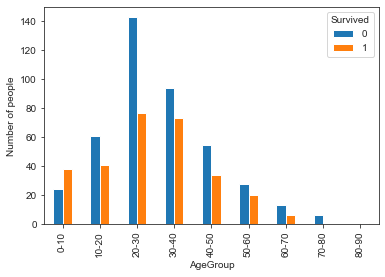

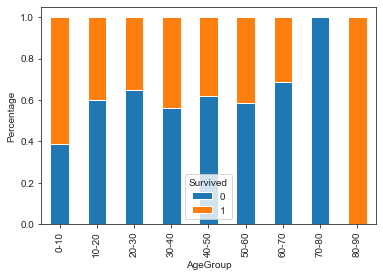

In [115]:
#count of survivors and non survivors by AgeGroup
tablebyage = pd.crosstab(df_agecleaned['AgeGroup'],df_agecleaned['Survived'])
print(tablebyage)
tablebyage.plot.bar(stacked=False).set_ylabel("Number of people")
tablebyage2 = pd.crosstab(df_agecleaned['AgeGroup'],df_agecleaned['Survived'], normalize='index')
tablebyage2.plot.bar(stacked=True).set_ylabel("Percentage")
print(tablebyage2)

#### --> we can see the fact that younger people had more chances to survive from above chart.

### 2.2 Was the fare the same for men and women?

[(0.0, 150.0)]

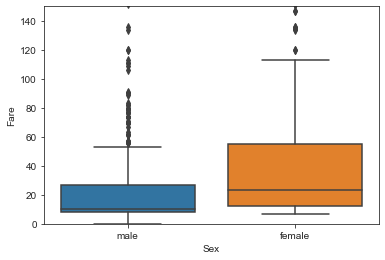

In [107]:
import seaborn as sns
ax = sns.boxplot(x='Sex', y = 'Fare', data=df)
ax.set(ylim=(0, 150))

#### We can see that the fare for women used to set higher than men's

### 2.3 How many female survivors compared to male survivors? Did the gender effect chances of survival?

Survived    0    1
Sex               
female     64  197
male      360   93
Survived         0         1
Sex                         
female    0.245211  0.754789
male      0.794702  0.205298


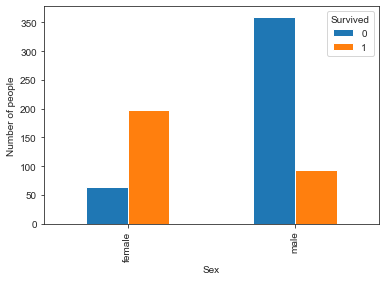

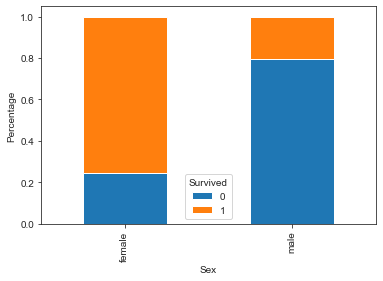

In [123]:
tablebysex = pd.crosstab(df_agecleaned['Sex'],df_agecleaned['Survived'])
print(tablebysex)
tablebysex.plot.bar(stacked=False).set_ylabel("Number of people")
tablebysex2 = pd.crosstab(df_agecleaned['Sex'],df_agecleaned['Survived'], normalize='index')
tablebysex2.plot.bar(stacked=True).set_ylabel("Percentage")
print(tablebysex2)

#### More Women survived than men

### 2.4 How many passengers where in each class? How many passengers survived in each class? Did Pclass affect survival?

Survived    0    1
Pclass            
1          64  122
2          90   83
3         270   85
Survived         0         1
Pclass                      
1         0.344086  0.655914
2         0.520231  0.479769
3         0.760563  0.239437


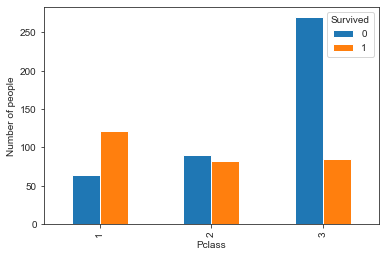

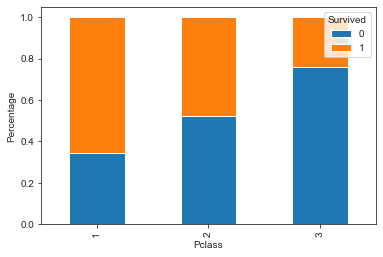

In [124]:
tablebyclass = pd.crosstab(df_agecleaned['Pclass'],df_agecleaned['Survived'])
print(tablebyclass)
tablebyclass.plot.bar(stacked=False).set_ylabel("Number of people")
tablebyclass2 = pd.crosstab(df_agecleaned['Pclass'],df_agecleaned['Survived'], normalize='index')
tablebyclass2.plot.bar(stacked=True).set_ylabel("Percentage")
print(tablebyclass2)

#### Higher class survived more than men